In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import numpy as np
import tensorflow as tf
print('Tensorflow version', tf.__version__)
from functools import partial

from include import decoder
from include import fit
from include import helpers 

from matplotlib import pyplot as plt

Tensorflow version 1.12.0


In [2]:
def get_inpainted_img(img):
    mask = helpers.load_mask('test_data/')
    img_noisy = img * mask
    return img_noisy, mask

img_clean = helpers.load_img('test_data/', 'poster')

In [3]:
def recover(img_noisy, img_clean, mask, k=256, numit=40000, rn=0.005, rnd=500, 
            upsample_first=False, find_best=True, device='gpu'):
    num_channels = [k] * 5
    img_clean = img_clean[None, :, :, :]
    img_noisy = img_noisy[None, :, :, :]
    net_fn = partial(decoder.decodernw,
                     num_output_channels=img_noisy.shape[-1], 
                     num_channels_up=num_channels,
                     upsample_first=upsample_first)
    _, mse_t, _, out_img = fit.fit(num_channels=num_channels,
                                   reg_noise_std=rn,
                                   reg_noise_decayevery=rnd,
                                   num_iter=numit,
                                   LR=0.0025,
                                   img_noisy=img_noisy,
                                   net=net_fn,
                                   mask=mask,
                                   img_clean=img_clean,
                                   find_best=find_best,
                                   device=device)                 
    return out_img[0], mse_t

def plot_results(out_img, img_clean, img_noisy):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 15))
    
    ax1.imshow(img_clean)
    ax1.set_title('Original image')
    ax1.axis('off')
    
    ax2.imshow(img_noisy)
    ax2.set_title( "Noisy observation, PSNR: %.2f" % helpers.psnr(img_clean, img_noisy))
    ax2.axis('off')

    ax3.imshow(out_img)
    ax3.set_title( "Deep-Decoder recovered image, SNR: %.2f" % helpers.psnr(img_clean, out_img)) 
    ax3.axis('off')    
    plt.show()

### After 1000 steps

shape:  [1, 16, 16, 256]
optimize with adam 0.0025
Final graph size: 4.36 MB
[Iteration 00990] loss=0.00125  true loss=0.00186  true loss orig=0.00175  noise energy=0.05093
Best MSE (wrt noisy) 0.000838815
MSE (wrt true) 0.0013505946


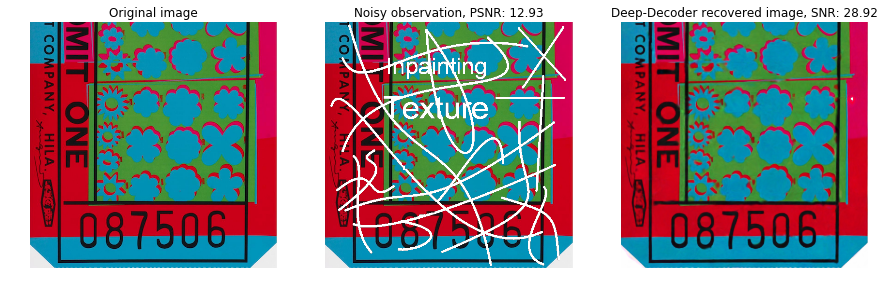

In [4]:
img_noisy, mask = get_inpainted_img(img_clean)
out_img, _ = recover(img_noisy, img_clean, mask, numit=1000)
plot_results(out_img, img_clean, img_noisy)

### After 40000 steps

shape:  [1, 16, 16, 256]
optimize with adam 0.0025
Final graph size: 4.36 MB
[Iteration 39990] loss=0.00008  true loss=0.00041  true loss orig=0.00041  noise energy=0.05093
Best MSE (wrt noisy) 4.245639e-05
MSE (wrt true) 0.00036433496


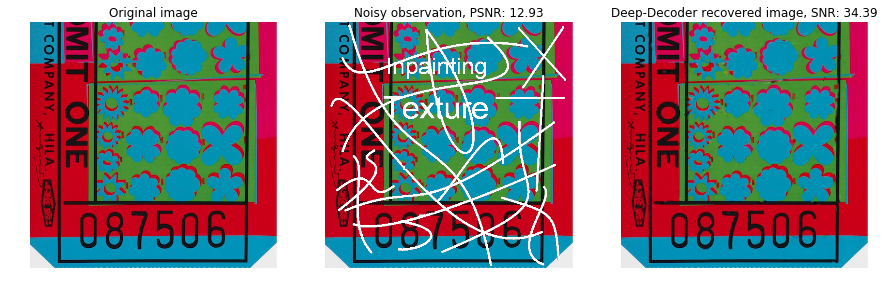

In [5]:
img_noisy, mask = get_inpainted_img(img_clean)
out_img, _ = recover(img_noisy, img_clean, mask, numit=40000)
plot_results(out_img, img_clean, img_noisy)